In [1]:
import os

import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interp
import scipy.ndimage as ndi

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['text.usetex'] = True

from migdalcalc import migdalcalc as mc
from migdalcalc.migdal import kinematics as kin

In [2]:
library = "ENDFBVIII"

Xe128 = mc.migdalcalc(target="Xe-128", nuclear_data_name=library)
Xe129 = mc.migdalcalc(target="Xe-129", nuclear_data_name=library)
Xe130 = mc.migdalcalc(target="Xe-130", nuclear_data_name=library)
Xe131 = mc.migdalcalc(target="Xe-131", nuclear_data_name=library)
Xe132 = mc.migdalcalc(target="Xe-132", nuclear_data_name=library)
Xe134 = mc.migdalcalc(target="Xe-134", nuclear_data_name=library)
Xe136 = mc.migdalcalc(target="Xe-136", nuclear_data_name=library)

Xe_isotopes = [Xe128, Xe129, Xe130, Xe131, Xe132, Xe134, Xe136]
labels = ["Xe-128", "Xe-129", "Xe-130", "Xe-131", "Xe-132", "Xe-134", "Xe-136"]

DD_energy = 2.5e6
DT_energy = 1.4e7


q_e = np.sqrt(kin.q_e2(kin.E_R_elastic(np.cos(180*np.pi/180),131, DT_energy),131))
print(q_e)

1336.5477410010826


0.12129970821233087
Lower cutoff is 0 eV
Integral of Ibe. et al: 5.466287363673259e-07
Integral of mpa: 4.924573154581761e-07
Integral of mcabe: 2.3613716238527696e-07
Ratio mpa/ibe: 0.9008990612730109
Ratio McCabe/Ibe: 0.4319881972443477

Lower cutoff is 660 eV
Integral of Ibe. et al: 1.9323434614745004e-08
Integral of mpa: 1.641894756863716e-08
Integral of mcabe: 1.3055328093422424e-08
Ratio mpa/ibe: 0.8496909527723638
Ratio McCabe/Ibe: 0.6756215110672086



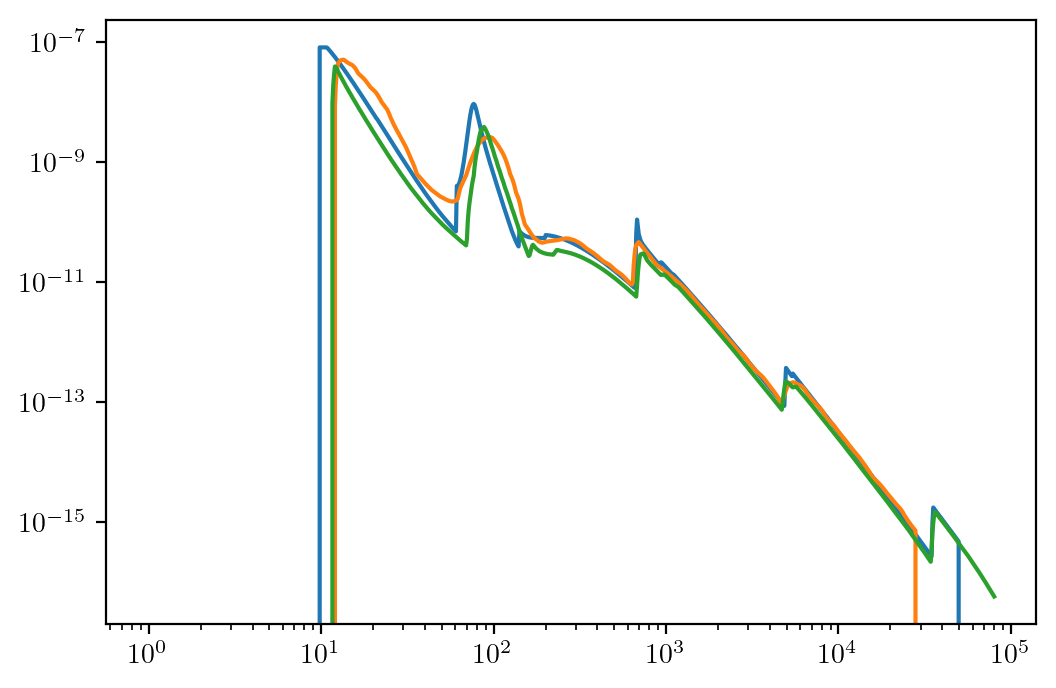

In [3]:
dE_range = np.geomspace(1, 80000, 1000)

plt.plot(dE_range, Xe131.mig.dP_dDeltaE(dE_range,method='ibe'),label='Ibe')
plt.plot(dE_range, Xe131.mig.dP_dDeltaE(dE_range,method='mpa'),label='mpa')
plt.plot(dE_range, Xe131.mig.dP_dDeltaE(dE_range,method='mccabe'),label='McCabe')

plt.xscale('log')
plt.yscale('log')

print((511**2)*integrate.quad(lambda x: Xe131.mig.dP_dDeltaE(x,method='ibe'),10.8, np.infty,epsrel=1e-8)[0])


def ratio_compare(dE_low):
    ibe_int = integrate.quad(lambda x: Xe131.mig.dP_dDeltaE(x,method='ibe'),dE_low, np.infty)[0]
    mpa_int = integrate.quad(lambda x: Xe131.mig.dP_dDeltaE(x,method='mpa'),dE_low, np.infty)[0]
    mccabe_int = integrate.quad(lambda x: Xe131.mig.dP_dDeltaE(x,method='mccabe'),dE_low, np.infty)[0]

    print(f'Lower cutoff is {dE_low} eV')
    print(f'Integral of Ibe. et al: {ibe_int}')
    print(f'Integral of mpa: {mpa_int}')
    print(f'Integral of mcabe: {mccabe_int}')

    print(f'Ratio mpa/ibe: {mpa_int/ibe_int}')
    print(f'Ratio McCabe/Ibe: {mccabe_int/ibe_int}')
    print()


ratio_compare(0)
ratio_compare(660)

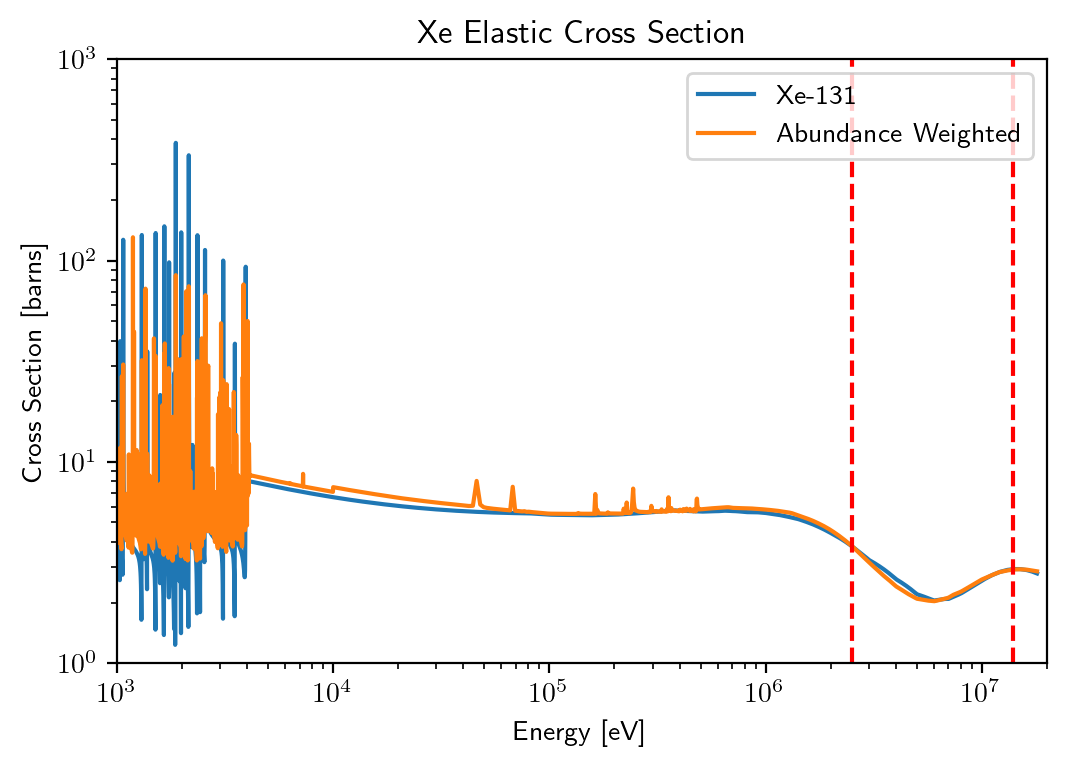

In [4]:
En_range = np.concatenate((np.geomspace(1e3,1e4, 1000), np.linspace(1.01e4, 1.8e7, 10000)))

xsec_arr = []
for En in En_range:
    xsec = 0
    for Xe in Xe_isotopes:
        xsec += Xe.abundance*Xe.nuc.SIG(En)
    
    xsec_arr.append(xsec)
    
plt.plot(En_range, Xe131.nuc.SIG(En_range), label='Xe-131')
    
plt.plot(En_range, xsec_arr, label='Abundance Weighted')
plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.ylim(1, 1000)
plt.xlim(1e3, 2e7)

plt.xlabel('Energy [eV]')
plt.ylabel('Cross Section [barns]')
plt.title('Xe Elastic Cross Section')


xmin, xmax, ymin, ymax = plt.axis()


plt.vlines([DD_energy, DT_energy], ymin, ymax, linestyle='dashed', color='red')

plt.show()
    

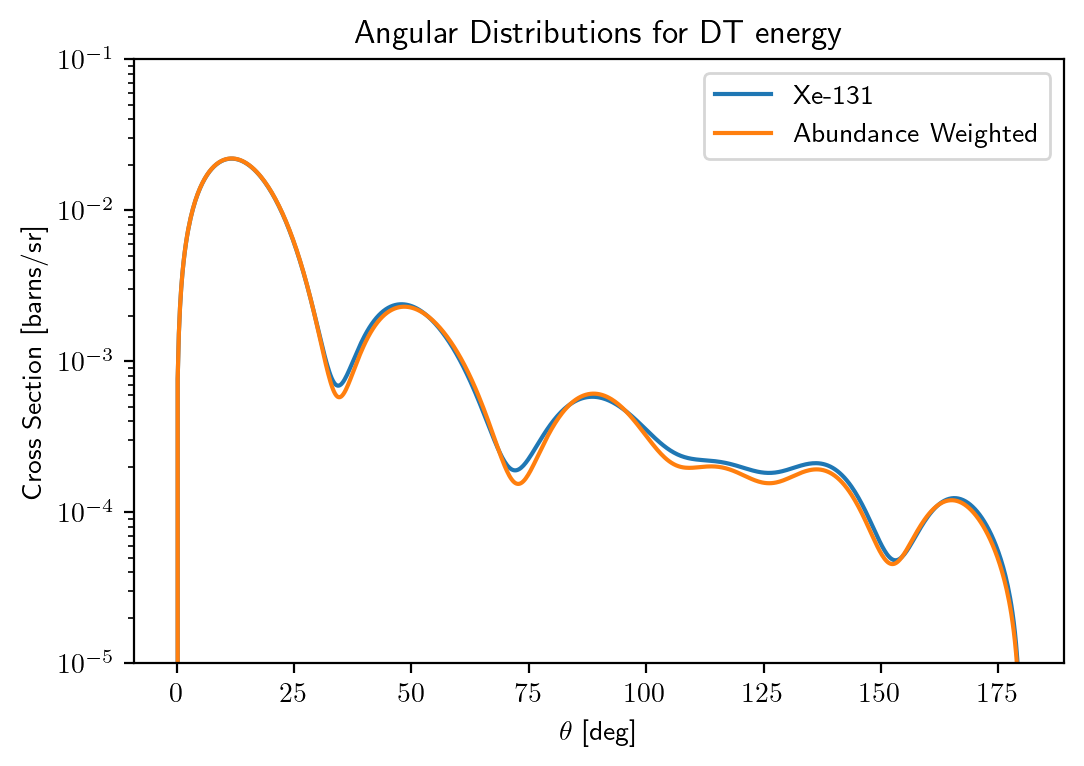

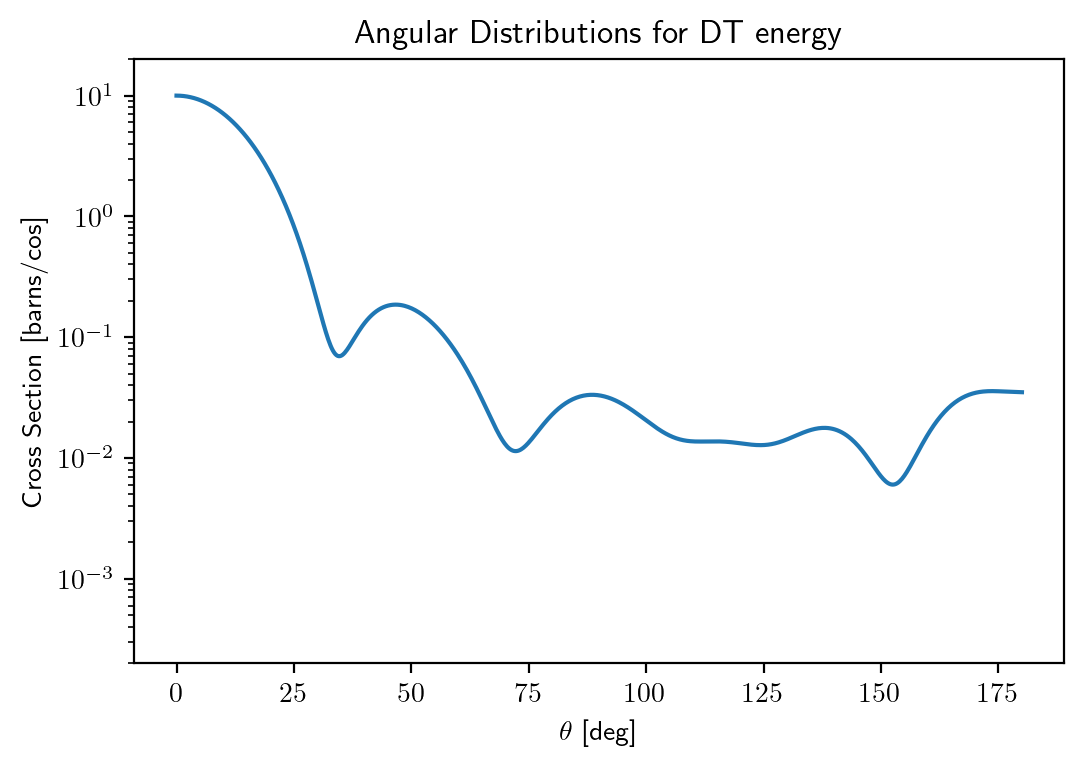

In [5]:
angles = np.linspace(0, 180, 720)
cos_range = np.linspace(-1, 1)



xsec_arr = []

for angle in angles:
    xsec = 0
    for Xe in Xe_isotopes:
        angular_dist = Xe.nuc.dSig_dOmega(DT_energy)
        xsec += Xe.abundance*(np.pi/180)*np.sin(np.pi*angle/180)*angular_dist(np.cos(np.pi*angle/180))

    xsec_arr.append(xsec)


angular_dist131 = Xe131.nuc.dSig_dOmega(DT_energy)
plt.plot(angles, (np.pi/180)*np.sin(np.pi*angles/180)*angular_dist131(np.cos(np.pi*angles/180)), label='Xe-131')
plt.plot(angles, xsec_arr, label='Abundance Weighted')

plt.legend()

plt.title('Angular Distributions for DT energy')
plt.yscale('log')
plt.ylim(1e-5, 1e-1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/sr]')
plt.show()

plt.plot(angles, angular_dist131(np.cos(np.pi*angles/180)))

plt.title('Angular Distributions for DT energy')
plt.yscale('log')
plt.ylim(2e-4, 2e1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/cos]')
plt.show()

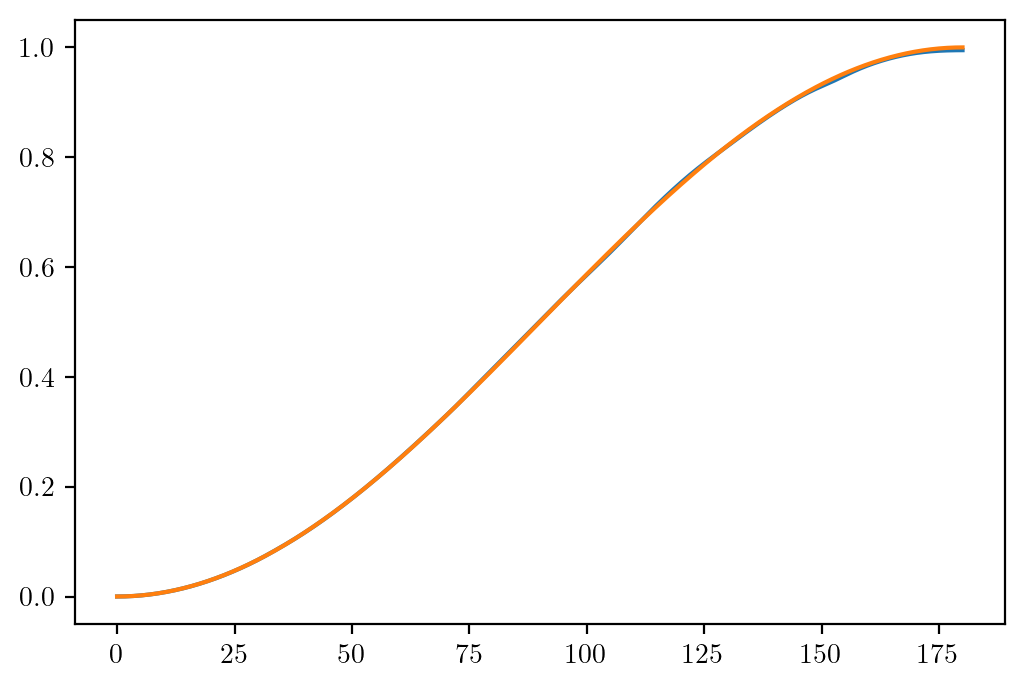

/var/folders/9z/c613c55s37gc7sthc_2397hc0000gn/T/ipykernel_97715/2007225422.py:27: RuntimeWarning: invalid value encountered in divide
  plt.plot(angles, (shape_arr/norm)/(0.5*(1-np.cos(np.pi*angles/180))))


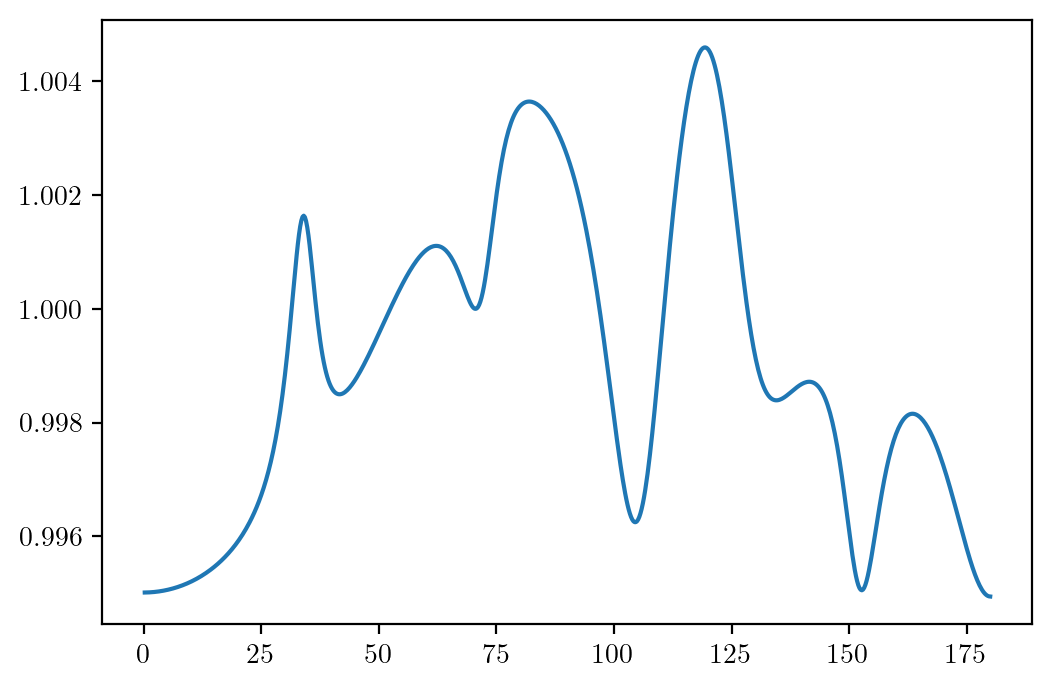

In [6]:
#compute migdal scalefactor "shape"
shape_arr = []


for angle in angles:
    num = 0
    den = 0
    for Xe in Xe_isotopes:
        angular_dist = Xe.nuc.dSig_dOmega(DT_energy)
        xsec = (np.pi/180)*np.sin(np.pi*angle/180)*angular_dist(np.cos(np.pi*angle/180))
        num += Xe.abundance*kin.E0(Xe.A, DT_energy)*xsec
        den += Xe.abundance*xsec
        
    if(angle == 0):
        num = 0
        den = 1
        
    shape_arr.append((1-np.cos(np.pi*angle/180))*num/den)
    
norm = -1*integrate.trapz(shape_arr, np.cos(np.pi*angles/180))
    

plt.plot(angles, shape_arr/norm)
plt.plot(angles, 0.5*(1-np.cos(np.pi*angles/180)))
plt.show()

plt.plot(angles, (shape_arr/norm)/(0.5*(1-np.cos(np.pi*angles/180))))
plt.show()


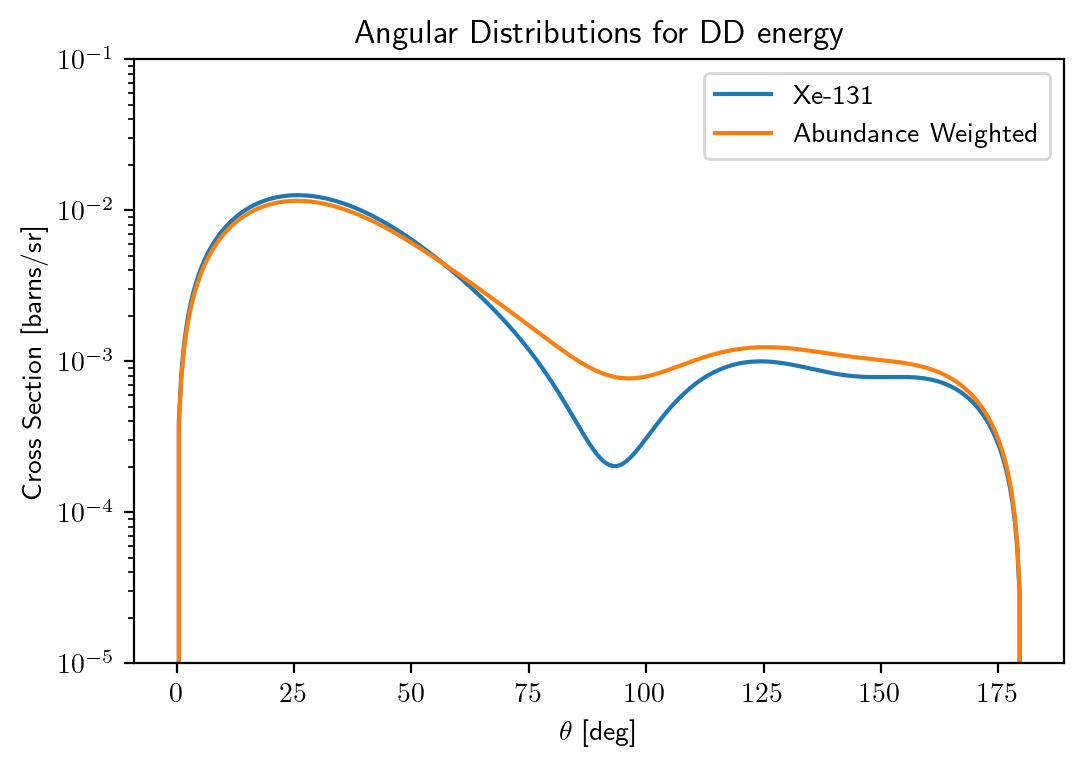

In [7]:
angles = np.linspace(0, 180, 360)
cos_range = np.linspace(-1, 1)

xsec_arr = []

for angle in angles:
    xsec = 0
    for Xe in Xe_isotopes:
        angular_dist = Xe.nuc.dSig_dOmega(DD_energy)
        xsec += Xe.abundance*(np.pi/180)*np.sin(np.pi*angle/180)*angular_dist(np.cos(np.pi*angle/180))

    xsec_arr.append(xsec)


angular_dist131 = Xe131.nuc.dSig_dOmega(DD_energy)
plt.plot(angles, (np.pi/180)*np.sin(np.pi*angles/180)*angular_dist131(np.cos(np.pi*angles/180)), label='Xe-131')
plt.plot(angles, xsec_arr, label='Abundance Weighted')

plt.legend()

plt.title('Angular Distributions for DD energy')
plt.yscale('log')
plt.ylim(1e-5, 1e-1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/sr]')
plt.show()

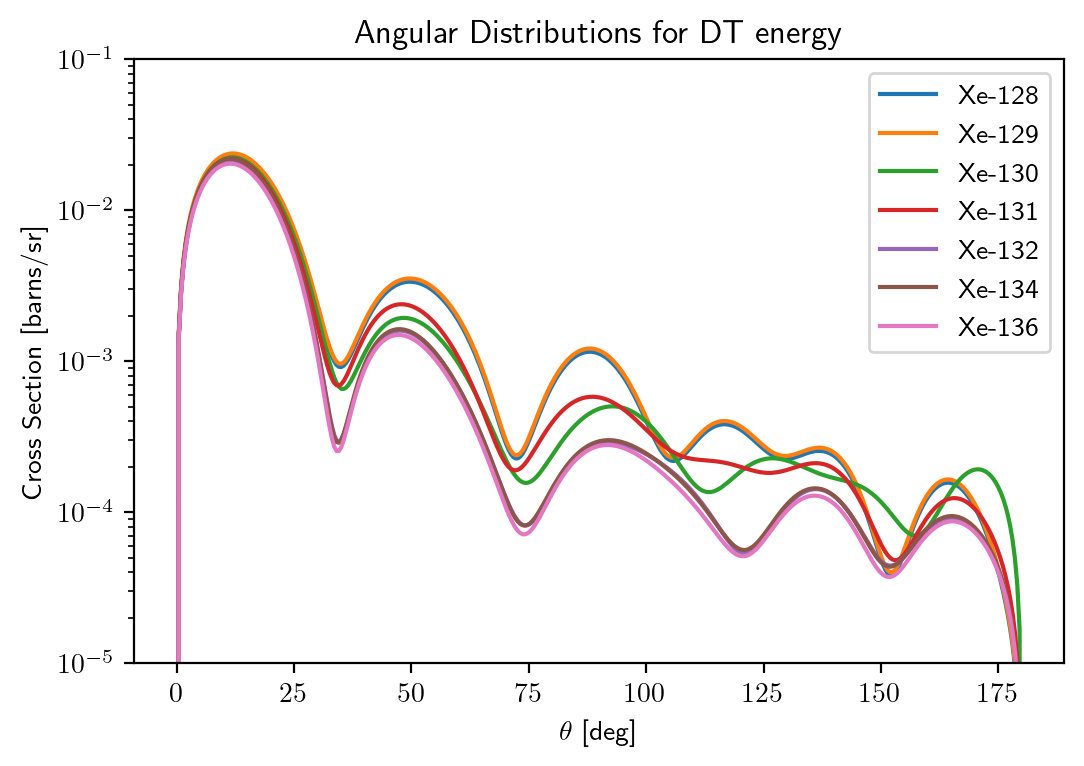

In [8]:
for (i,Xe) in enumerate(Xe_isotopes):
    angular_dist = Xe.nuc.dSig_dOmega(DT_energy)
    plt.plot(angles, (np.pi/180)*np.sin(np.pi*angles/180)*angular_dist(np.cos(np.pi*angles/180)), label=labels[i])

plt.title('Angular Distributions for DT energy')
plt.legend()
plt.yscale('log')
plt.ylim(1e-5, 1e-1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/sr]')
plt.show()

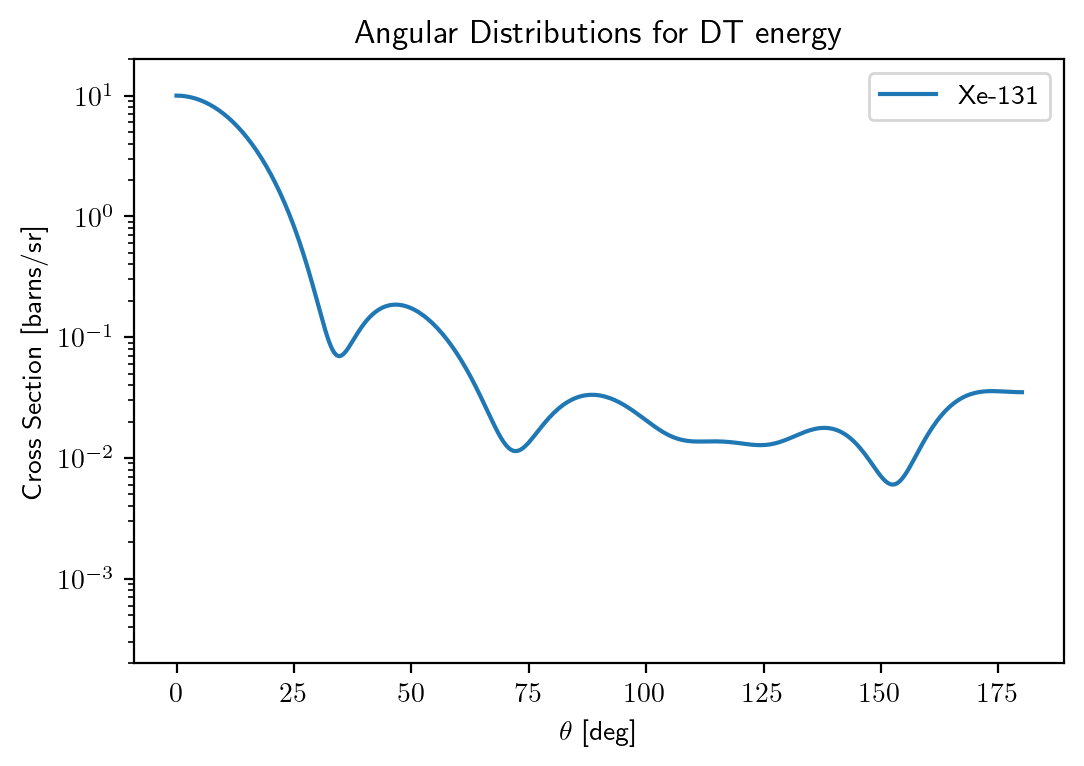

angle: 15.041782729805014 deg
R_ct = 1.31e-04
R_theta = 1.31e-04


In [17]:
angles = np.linspace(0, 180, 360)
cos_range = np.linspace(-1, 1)

xsec_arr = []
migdal_xsec_arr = []

migdal_angular_dist = Xe131.d2R_dc_dDeltaE(DT_energy,method='mpa')

for angle in angles:
    xsec = 0
    angular_dist = Xe131.nuc.dSig_dOmega(DT_energy)
    xsec += (np.pi/180)*np.sin(np.pi*angle/180)*angular_dist(np.cos(np.pi*angle/180))

    xsec_arr.append(xsec)
    
for angle in angles:
    migdal_rate_I = integrate.quad(lambda dE: migdal_angular_dist(dE, np.cos(np.pi*angle/180)), 1380, np.infty, limit=200,epsrel=1e-3)[0]
    migdal_rate = migdal_rate_I
    migdal_rate = (np.pi/180)*np.sin(np.pi*angle/180)*migdal_rate_I
    migdal_xsec_arr.append(migdal_rate)
    


angular_dist131 = Xe131.nuc.dSig_dOmega(DT_energy)
#plt.plot(angles, (np.pi/180)*np.sin(np.pi*angles/180)*angular_dist131(np.cos(np.pi*angles/180)), label='Xe-131')
plt.plot(angles, angular_dist131(np.cos(np.pi*angles/180)), label='Xe-131')
#plt.plot(angles, xsec_arr, label='Abundance Weighted')
plt.plot(angles, migdal_xsec_arr)

plt.legend()

plt.title('Angular Distributions for DT energy')
plt.yscale('log')
#plt.ylim(1e-5, 1e-1)
plt.ylim(2e-4, 2e1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/sr]')
plt.show()

print(f'angle: {angles[30]} deg')

#print(migdal_xsec_arr[30]/angular_dist131(np.cos(np.pi*angles[30]/180)))


mig_30 = migdal_xsec_arr[30]*(180/np.pi)*(1/np.sin(np.pi*angles[30]/180))

R_cos_theta = (mig_30)/angular_dist131(np.cos(np.pi*angles[30]/180))
R_theta = migdal_xsec_arr[30]/xsec_arr[30]
print(f'R_ct = {R_cos_theta:.2e}')
print(f'R_theta = {R_theta:.2e}')

In [10]:
print(angles[-1])

print(migdal_xsec_arr[-1]/angular_dist131(np.cos(np.pi*angles[-1]/180)))
print(angles[-1])

180.0
0.00741649351148525
180.0


In [11]:
angles = np.linspace(0, 180, 360)
cos_range = np.linspace(-1, 1)

lower_cutoff = 0

xsec_arr = []
migdal_131 = []

migdal_methods = ['ibe', 'mpa','mccabe']

migdal_xsec_dict = dict()

for angle in angles:
    xsec = 0
    for Xe in Xe_isotopes:
        angular_dist = Xe.nuc.dSig_dOmega(DT_energy)
        #xsec += Xe.abundance*(np.pi/180)*np.sin(np.pi*angle/180)*angular_dist(np.cos(np.pi*angle/180))
        xsec += Xe.abundance*angular_dist(np.cos(np.pi*angle/180))

    xsec_arr.append(xsec)


for method in migdal_methods:
    
    migdal_xsec_arr = []
    migdal_angular_dist = Xe131.d2R_dc_dDeltaE(DT_energy,method)
    
    for angle in angles:
        migdal_xsec = 0
        for (i, Xe) in enumerate(Xe_isotopes):
            migdal_angular_dist = Xe.d2R_dc_dDeltaE(DT_energy,method)
            I = integrate.quad(lambda dE: migdal_angular_dist(dE, np.cos(np.pi*angle/180)), lower_cutoff, np.infty, limit=100, epsrel=1e-3)
            #migdal_rate = (np.pi/180)*np.sin(np.pi*angle/180)*I[0]
            migdal_rate = I[0]
            migdal_xsec += Xe.abundance*migdal_rate
    
        migdal_xsec_arr.append(migdal_xsec)
        
    migdal_interp = interp.interp1d(angles, migdal_xsec_arr,bounds_error=False, fill_value=0, kind='linear')
        
    migdal_xsec_dict = migdal_xsec_dict | {method: migdal_interp}
    
    


/var/folders/9z/c613c55s37gc7sthc_2397hc0000gn/T/ipykernel_97715/917784098.py:32: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(lambda dE: migdal_angular_dist(dE, np.cos(np.pi*angle/180)), lower_cutoff, np.infty, limit=100, epsrel=1e-3)
/var/folders/9z/c613c55s37gc7sthc_2397hc0000gn/T/ipykernel_97715/917784098.py:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = integrate.quad(lambda dE: migdal_angular_dist(dE, np.cos(np.pi*angle/180)), 

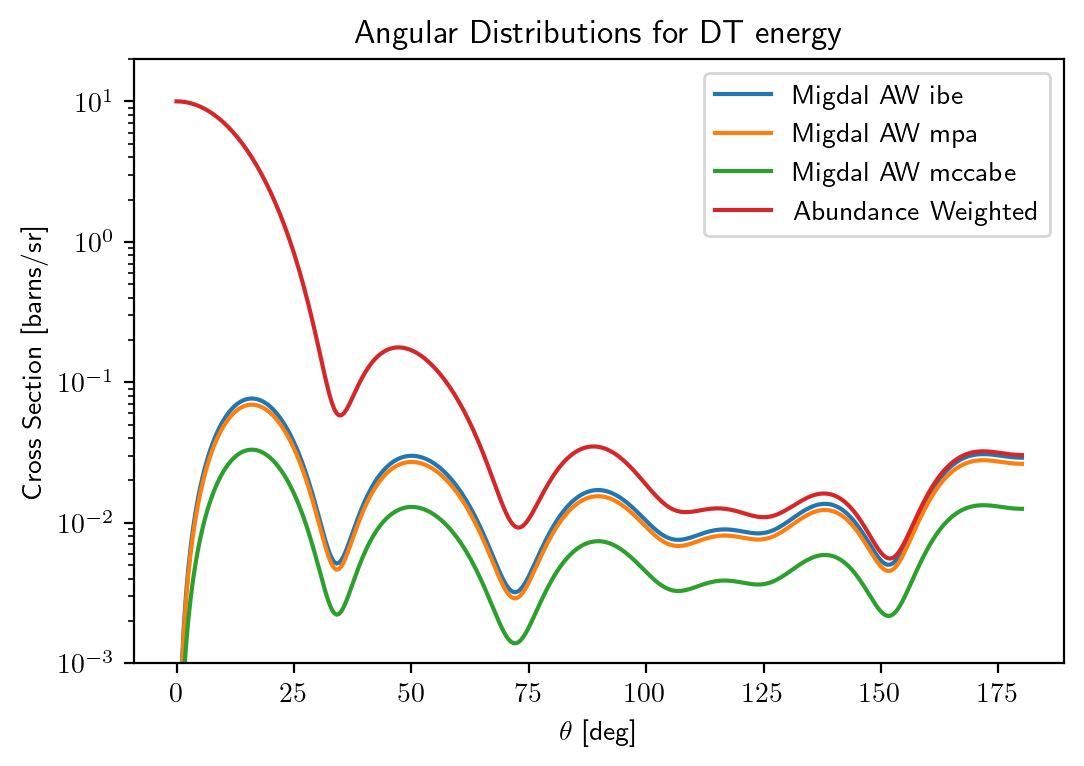

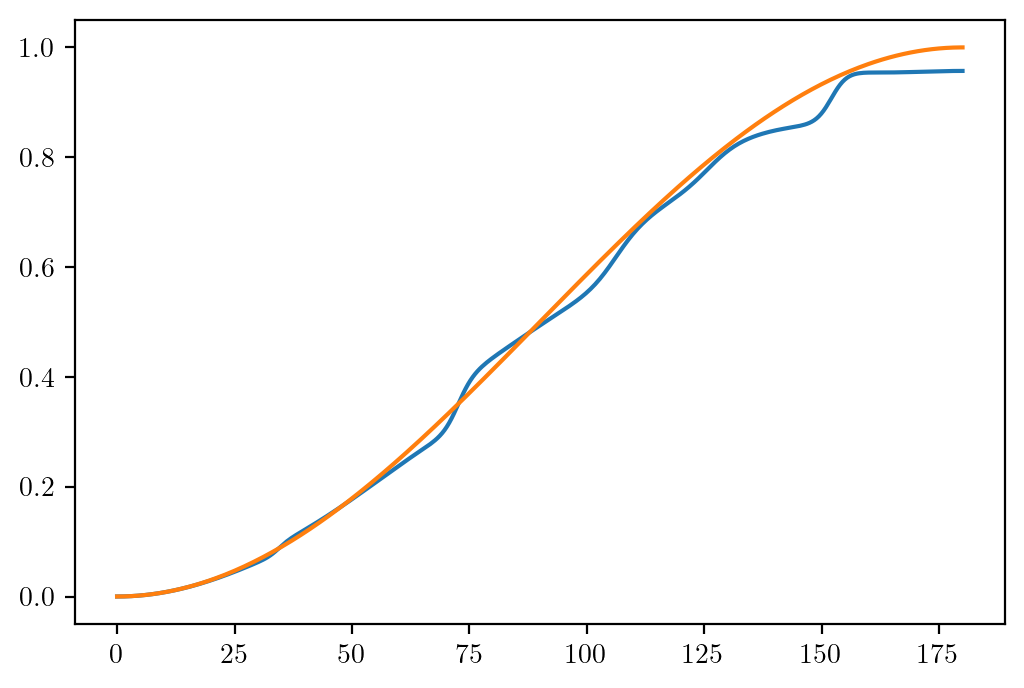

In [12]:
for key in migdal_xsec_dict.keys():
    migdal_xsec = migdal_xsec_dict[key]
    plt.plot(angles, migdal_xsec(angles),label=f'Migdal AW {key}')
    
#angular_dist131 = Xe131.nuc.dSig_dOmega(DT_energy)
#plt.plot(angles, (np.pi/180)*np.sin(np.pi*angles/180)*angular_dist131(np.cos(np.pi*angles/180)), label='Xe-131')
plt.plot(angles, xsec_arr, label='Abundance Weighted')

#plt.plot(angles, migdal_xsec_arr, label ='Migdal AW')

plt.legend()

plt.title('Angular Distributions for DT energy')
plt.yscale('log')
plt.ylim(1e-3, 20)
#plt.ylim(2e-4, 2e1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel('Cross Section [barns/sr]')
plt.show()

#Save to disk
migdal_xsec = migdal_xsec_dict['ibe']
plt.plot(angles, migdal_xsec(angles)/xsec_arr)
plt.plot(angles, 0.5*(1-np.cos(angles*np.pi/180)))
plt.show()

np.savetxt("elastic_abundance_weighted.csv", list(zip(angles, xsec_arr)), fmt='%.5e', delimiter=',',header='angle, barns/sr')
np.savetxt("migdal_abundance_weighted.csv", list(zip(angles, migdal_xsec_dict['ibe'](angles))), fmt='%.5e', delimiter=',',header='angle, barns/sr')

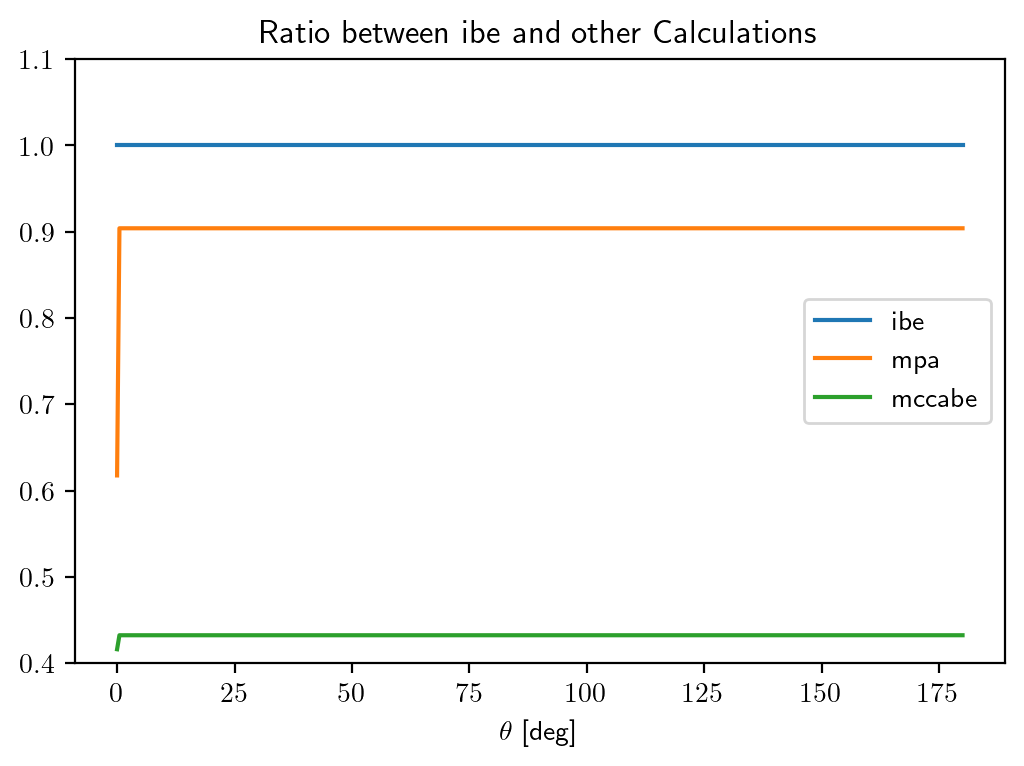

In [13]:
for key in migdal_xsec_dict.keys():
    migdal_xsec = migdal_xsec_dict[key]
    plt.plot(angles, migdal_xsec(angles)/migdal_xsec_dict['ibe'](angles),label=f'{key}')
    
plt.ylim(0.4, 1.1)
plt.xlabel(r'$\theta$ [deg]')

plt.legend()
plt.title('Ratio between ibe and other Calculations')

plt.show()